# 1. Data analysis

## Loading the Required Libraries and Modules

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics

## Learning About Our Data Set With Exploratory Data Analysis

### Data preparation

In [2]:
df = pd.read_csv("spam.csv")

### Removing Null Data From Our Data Set

In [3]:
### Dimension de la base de données
df.shape

(4601, 58)

In [4]:
#le nombre des valeurs null pour xhaque variable
df.isna().sum()

word_freq_make                 0
 word_freq_address             0
 word_freq_all                 0
 word_freq_3d                  0
 word_freq_our                 0
 word_freq_over                0
 word_freq_remove              0
 word_freq_internet            0
 word_freq_order               0
 word_freq_mail                0
 word_freq_receive             0
 word_freq_will                0
 word_freq_people              0
 word_freq_report              0
 word_freq_addresses           0
 word_freq_free                0
 word_freq_business            0
 word_freq_email               0
 word_freq_you                 0
 word_freq_credit              0
 word_freq_your                0
 word_freq_font                0
 word_freq_000                 0
 word_freq_money               0
 word_freq_hp                  0
 word_freq_hpl                 0
 word_freq_george              0
 word_freq_650                 0
 word_freq_lab                 0
 word_freq_labs                0
 word_freq

<AxesSubplot:>

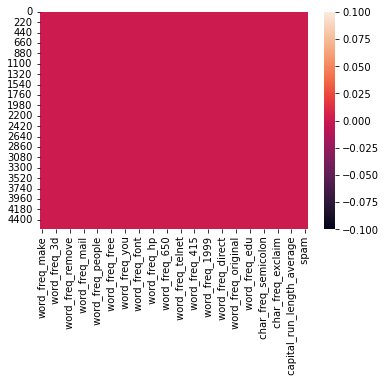

In [5]:
#visualizaton des valeur null
sns.heatmap(df.isna())

In [6]:
#suppression des valeer null
df = df.dropna()

<AxesSubplot:>

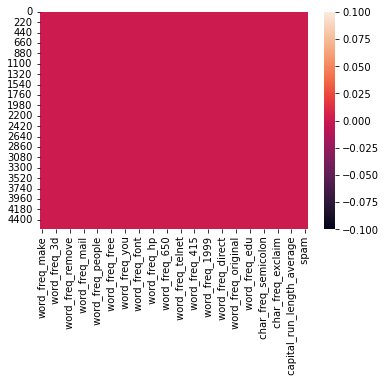

In [7]:
#visualizaton apres la suppression
sns.heatmap(df.isna())

###  Descriptive stats

In [8]:
#afficher les premières lignes du jeu de données
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [9]:
### Dimension de la base de données
df.shape

(4601, 58)

In [10]:
### Type de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   word_freq_make               4601 non-null   float64
 1    word_freq_address           4601 non-null   float64
 2    word_freq_all               4601 non-null   float64
 3    word_freq_3d                4601 non-null   float64
 4    word_freq_our               4601 non-null   float64
 5    word_freq_over              4601 non-null   float64
 6    word_freq_remove            4601 non-null   float64
 7    word_freq_internet          4601 non-null   float64
 8    word_freq_order             4601 non-null   float64
 9    word_freq_mail              4601 non-null   float64
 10   word_freq_receive           4601 non-null   float64
 11   word_freq_will              4601 non-null   float64
 12   word_freq_people            4601 non-null   float64
 13   word_freq_report 

In [11]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [12]:
#The Prevalence of Each Classification Category

### Variables Analysis

#### Variables Distribution

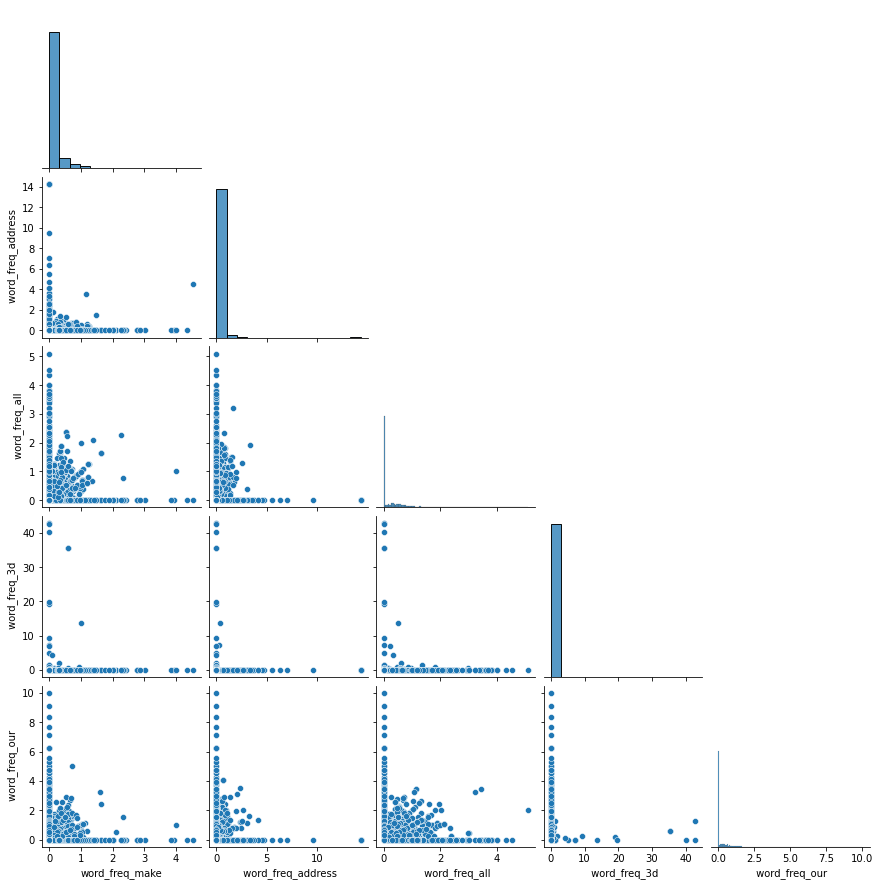

In [13]:
# pd.plotting.scatter_matrix(df, c=y, figsize=(12, 10))
sns.pairplot(df.iloc[:, :5], corner=True)
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

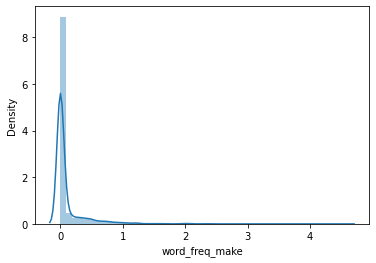

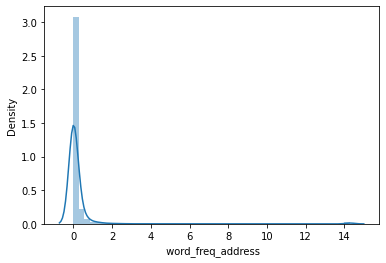

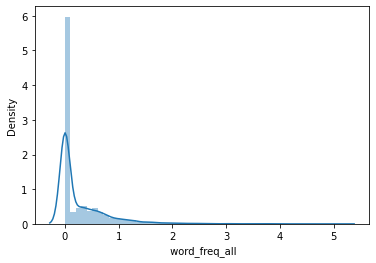

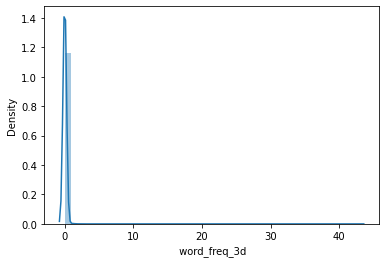

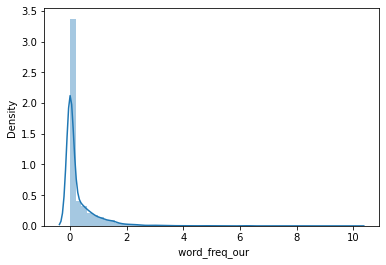

In [14]:
#the first five variables
i= 0
for col in df.keys():
    if i == 5:
        break 
    plt.figure()
    sns.distplot(df[col])
    i+=1

### Variables-Targuet Relation

#### Variables-Targuet

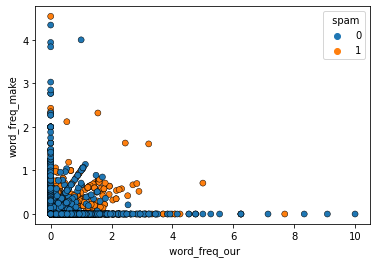

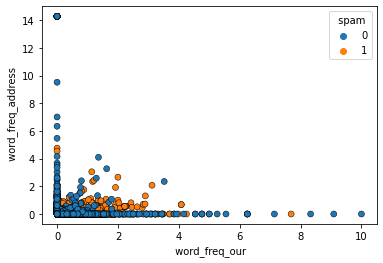

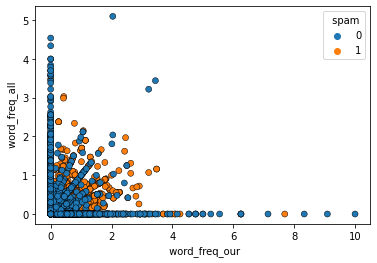

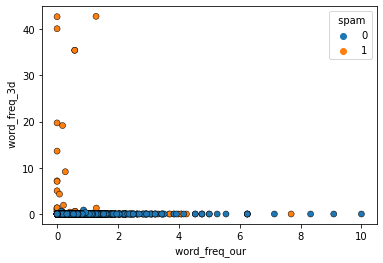

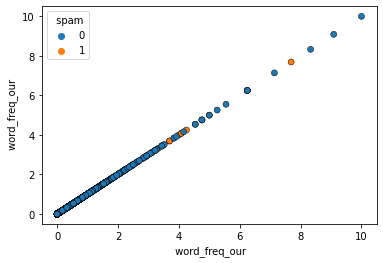

In [15]:
# new data
X_new = np.array([[5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3], [4.7, 3.2, 1.3, 0.2]])
i= 0
for col in df.keys():
    if i == 5:
        break 
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x=' word_freq_our', y=col, hue=' spam', ax=ax, edgecolor='k')
    plt.show()
    i+=1

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

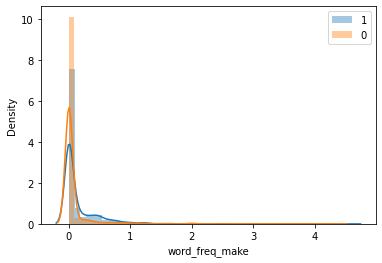

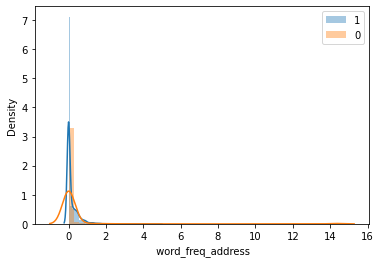

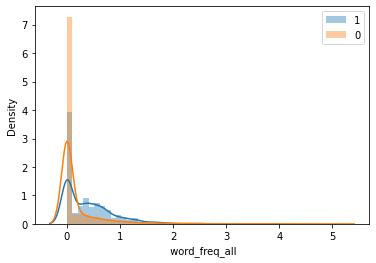

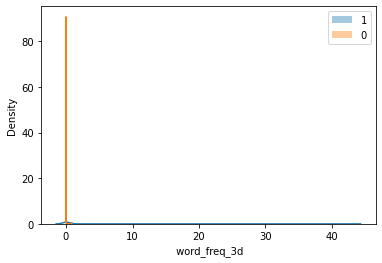

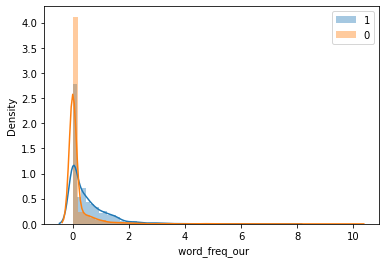

In [16]:
df1=df[df[' spam']==0]
df2=df[df[' spam']==1]
i= 0
for col in df.keys():
    if i == 5:
        break 
    plt.figure()
    sns.distplot(df2[col], label=1)
    sns.distplot(df1[col], label=0)
    plt.legend()
    i+=1

### Examiner le targuet

<AxesSubplot:xlabel=' spam', ylabel='count'>

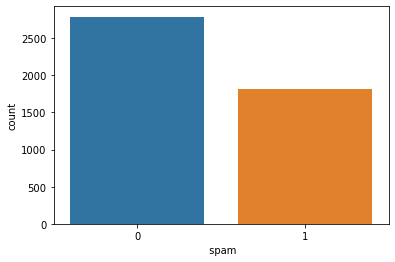

In [17]:
sns.countplot(x=' spam', data=df)

### Matrice de corrélation entre les variables(explicatives et prédire)

<AxesSubplot:>

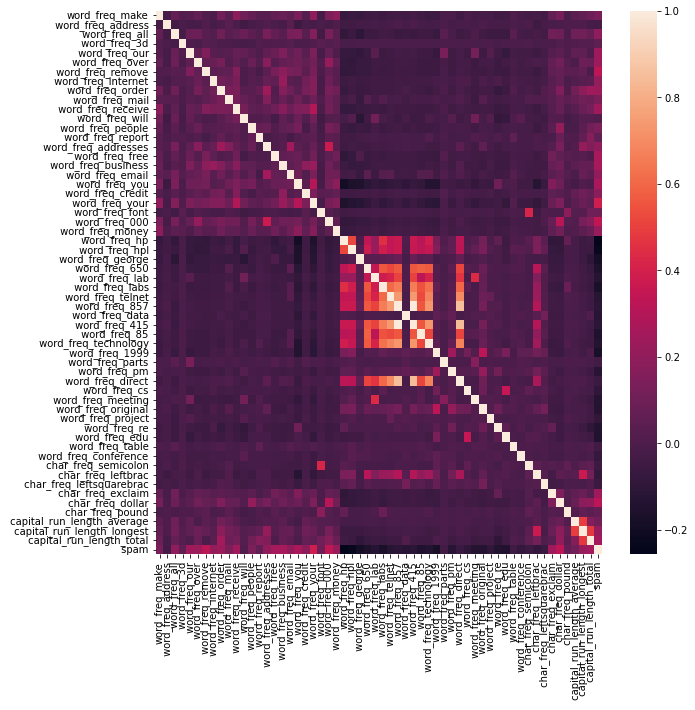

In [18]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#.plt.show()

# 2. Protocole expérimental (apprentissage/validation/test)


### Creating Training Data and Test Data

In [19]:
y = df[' spam']
X = df.drop(' spam', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Training the Logistic Regression Model

In [20]:
# instantiate the model
logreg = LogisticRegression()
# Fit the classifier to the data
# fit it to the training data
logreg.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Making Predictions With Our Logistic Regression Model

In [21]:
# Predict the labels for the training data X
# make predictions on the test data
y_pred = logreg.predict(X_test)

### Measuring the Performance of a Logistic Regression Machine Learning Model

### Model Evaluation using Confusion Matrix

In [22]:
# confusion_matrix
print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test, y_pred)}\n')

# classification report
print(f'Classification Report: \n{metrics.classification_report(y_test, y_pred)}')

Confusion Matrix:
[[529  31]
 [ 32 329]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       560
           1       0.91      0.91      0.91       361

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



### Visualizing Confusion Matrix using Heatmap

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

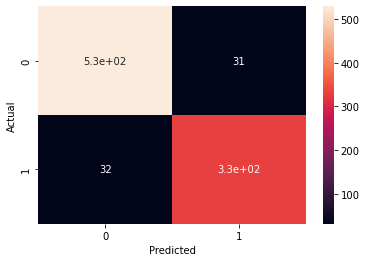

In [23]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

### Confusion Matrix Evaluation Metrics

In [24]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9315960912052117
Precision: 0.9138888888888889
Recall: 0.9113573407202216


### ROC Curve (Plotting an ROC curve)

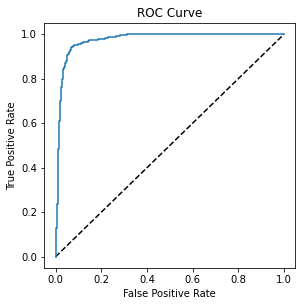

In [25]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.subplots(figsize=(4.5, 4.5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### AUC 

In [26]:
# pass the True labels and the predicted probabilites to roc_auc_score
metrics.roc_auc_score(y_test, y_pred_prob)

0.9739562722595964

### Training the svm model

In [27]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

### Making Predictions With  svm model

In [28]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Measuring the Performance of a svm Machine Learning Model

### Model Evaluation using Confusion Matrix

In [29]:
# confusion_matrix
print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test, y_pred)}\n')

# classification report
print(f'Classification Report: \n{metrics.classification_report(y_test, y_pred)}')

Confusion Matrix:
[[532  28]
 [ 31 330]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       560
           1       0.92      0.91      0.92       361

    accuracy                           0.94       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.94      0.94      0.94       921



### Visualizing Confusion Matrix using Heatmap

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

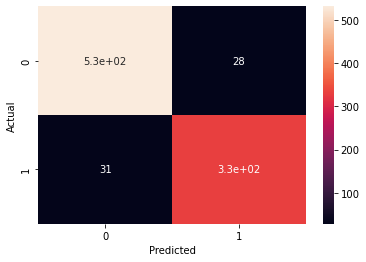

In [31]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

### Confusion Matrix Evaluation Metrics

In [32]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9359391965255157
Precision: 0.9217877094972067
Recall: 0.9141274238227147


### ROC Curve (Plotting an ROC curve)

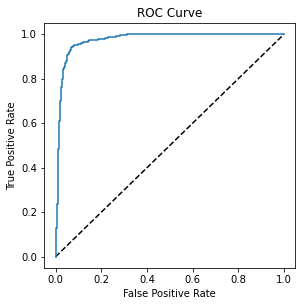

In [33]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.subplots(figsize=(4.5, 4.5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### AUC 

In [34]:
# pass the True labels and the predicted probabilites to roc_auc_score
metrics.roc_auc_score(y_test, y_pred_prob)

0.9739562722595964

### Training and Making Predictions with the DNN Model

In [36]:
print("Dimensions de x_train :", X_train.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de x_test  :", X_test.shape)
print("Dimensions de y_test  :", y_test.shape)

Dimensions de x_train : (3680, 57)
Dimensions de y_train : (3680,)
Dimensions de x_test  : (921, 57)
Dimensions de y_test  : (921,)


In [37]:
model = keras.models.Sequential(name='DNN')
model.add(layers.Input((57,), name="Couche_in"))
model.add(layers.Dense(100, activation='relu', name='Couche_cachee1'))
model.add(layers.Dense(100, activation='relu', name='Couche_cachee2'))
model.add(layers.Dense(1, name='Couche_out'))

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])

In [39]:
model.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Couche_cachee1 (Dense)      (None, 100)               5800      
                                                                 
 Couche_cachee2 (Dense)      (None, 100)               10100     
                                                                 
 Couche_out (Dense)          (None, 1)                 101       
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [40]:
hist = model.fit(X_train,
                 y_train,
                 epochs=100,
                 batch_size=50)

Epoch 1/100
74/74 [==============================] - 4s 6ms/step - loss: 6.1077 - mae: 62.2726
Epoch 2/100
74/74 [==============================] - 1s 12ms/step - loss: 6.0861 - mae: 72.2275
Epoch 3/100
74/74 [==============================] - 0s 5ms/step - loss: 6.0861 - mae: 72.2343
Epoch 4/100
74/74 [==============================] - 0s 5ms/step - loss: 6.0861 - mae: 72.2343
Epoch 5/100
74/74 [==============================] - 0s 7ms/step - loss: 6.0861 - mae: 72.2343
Epoch 6/100
74/74 [==============================] - 0s 6ms/step - loss: 6.0861 - mae: 72.2343
Epoch 7/100
74/74 [==============================] - 0s 6ms/step - loss: 6.0861 - mae: 72.2343
Epoch 8/100
74/74 [==============================] - 1s 9ms/step - loss: 6.0861 - mae: 72.2343
Epoch 9/100
74/74 [==============================] - 1s 11ms/step - loss: 6.0861 - mae: 72.2343
Epoch 10/100
74/74 [==============================] - 1s 9ms/step - loss: 6.0861 - mae: 72.2343
Epoch 11/100
74/74 [===========================

### Making Predictions With Our DNN Model

In [41]:
pred_test = model.predict(X_test)
pred_test.shape

(921, 1)

In [42]:
pred_test = model.predict(X_test)
np.mean(np.array([int(pred_test[i][0]+0.5) for i in range(len(pred_test))])==y_test)

0.009771986970684038

### Measuring the Performance of a DNN Machine Learning Model

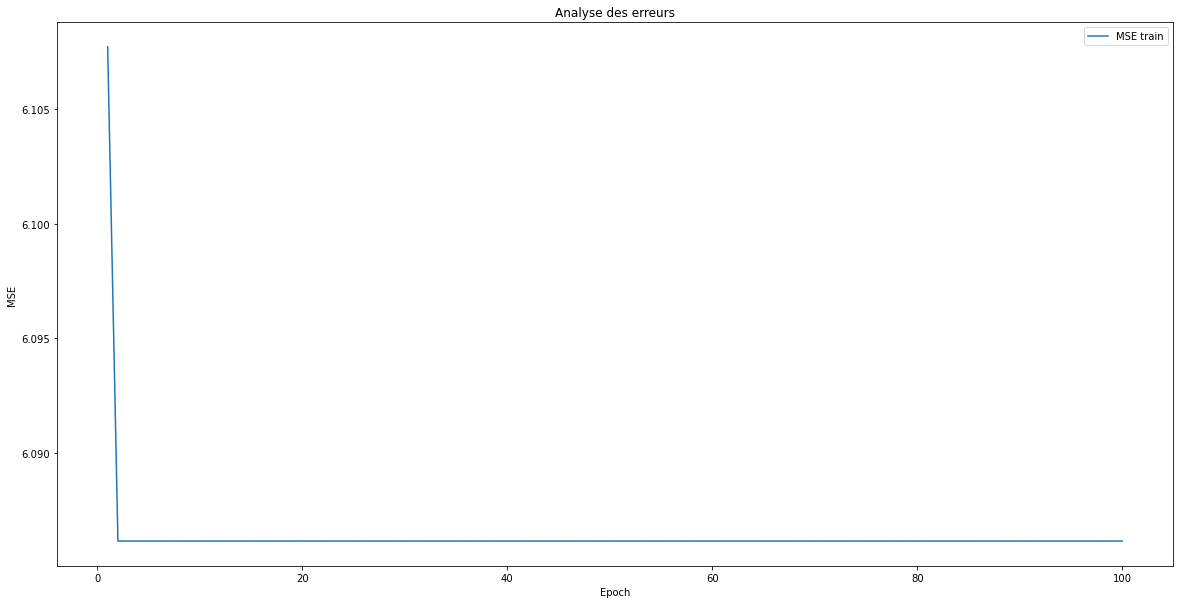

In [43]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.legend(['MSE train', 'MSE validation'])
plt.show()

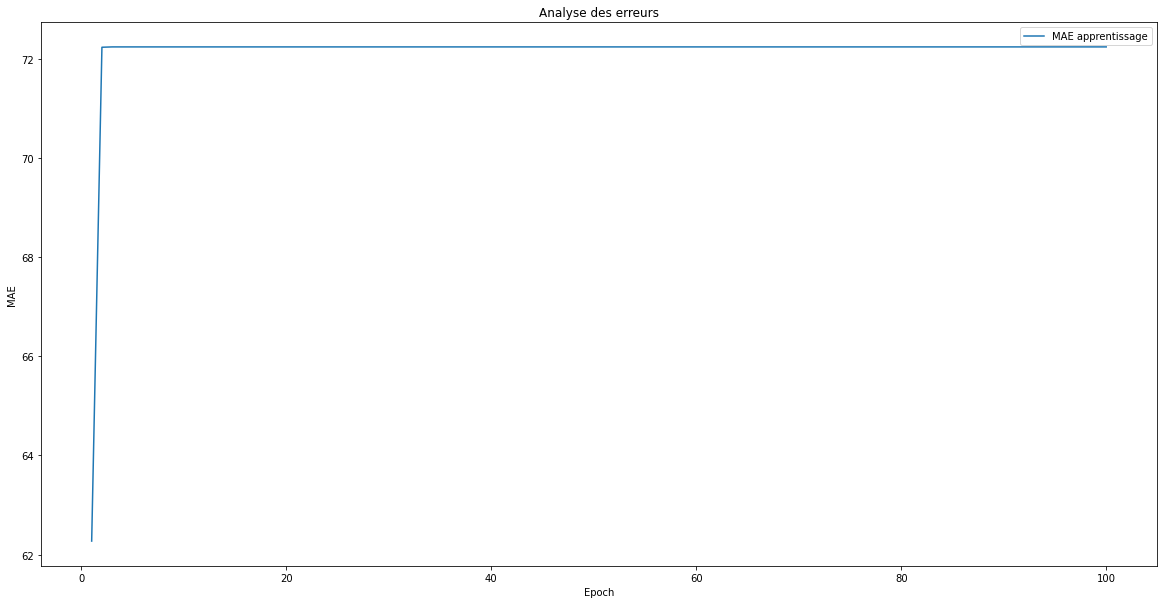

In [44]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.legend(['MAE apprentissage', 'MAE validation'])
plt.show()

In [45]:
result_valid = model.evaluate(X_train, y_train, verbose=0)
print('MSE valid', round(result_valid[0],2))
print('MAE valid', round(result_valid[1],2))

MSE valid 6.09
MAE valid 72.23


In [46]:
result_test = model.evaluate(X_test, y_test, verbose=0)
print('MSE test', round(result_test[0],2))
print('MAE test', round(result_test[1],2))

MSE test 6.05
MAE test 75.78
